#**COVID-19 Clinical Trials – Exploratory Data Analysis**


**Objective**

The objective of this project is to perform end-to-end exploratory data analysis (EDA) on global COVID-19 clinical trials data obtained from ClinicalTrials.gov.  
The analysis aims to understand trial distribution, study status, phases, enrollment patterns, geographical trends, and data quality issues to derive healthcare research insights.

## Dataset Description

This dataset is sourced from ClinicalTrials.gov (maintained by the National Institutes of Health) and contains global COVID-19 clinical trial records.  
It consists of 5,783 rows and 26 columns, including study status, phase, enrollment, conditions, interventions, dates, sponsors, and geographic locations.


In [1]:
#Importing Libraries and loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/COVID clinical trials (1).csv')

In [2]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [3]:
df.columns
df.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Acronym,3303
Status,0
Study Results,0
Conditions,0
Interventions,886
Outcome Measures,35
Sponsor/Collaborators,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [4]:
#Dropping unnecessary columns
df.drop(columns=['Rank', 'URL', 'Study Documents', 'Other IDs'], inplace=True)


In [5]:
#checking for missing values
df.isnull().sum()


,0
NCT Number,0
Title,0
Acronym,3303
Status,0
Study Results,0
Conditions,0
Interventions,886
Outcome Measures,35
Sponsor/Collaborators,0
Gender,10


In [6]:
#Replacing Null Values
text_fill_columns = [
    'Acronym',
    'Study Designs',
    'Gender',
    'Locations'
]

for col in text_fill_columns:
    df[col] = df[col].fillna("Not Specified")


In [7]:
df['Phases'] = df['Phases'].fillna("Not Applicable")
df['Interventions'] = df['Interventions'].fillna("Not Reported")
df['Outcome Measures'] = df['Outcome Measures'].fillna("Not Reported")


In [8]:
date_columns = [
    'Start Date',
    'Primary Completion Date',
    'Completion Date',
    'Results First Posted'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [9]:
df.drop_duplicates(inplace=True)


In [10]:

df['Conditions'] = df['Conditions'].str.lower()


In [11]:
#Adding New Necessary Column
df['Study Duration (Days)'] = (
    df['Completion Date'] - df['Start Date']
).dt.days


In [12]:
df['Start Year'] = df['Start Date'].dt.year


In [13]:
df.head()

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Designs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Duration (Days),Start Year
0,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Allocation: N/A|Intervention Model: Single Gro...,2020-11-09,2020-12-22,2021-04-30,"March 8, 2021",NaT,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",172.0,2020.0
1,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,sars-cov-2 infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Allocation: Randomized|Intervention Model: Par...,2020-11-02,2020-12-15,2021-01-29,"October 20, 2020",NaT,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",88.0,2020.0
2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational Model: Cohort|Time Perspective: ...,2020-05-07,2021-06-15,2021-06-15,"May 20, 2020",NaT,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",404.0,2020.0
3,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,covid,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational Model: Cohort|Time Perspective: ...,2020-05-25,2020-07-31,2020-08-31,"June 4, 2020",NaT,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",98.0,2020.0
4,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,maternal fetal infection transmission|covid-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational Model: Cohort|Time Perspective: ...,2020-05-05,NaT,NaT,"May 20, 2020",NaT,"June 4, 2020","CHR Orléans, Orléans, France",NaN,2020.0


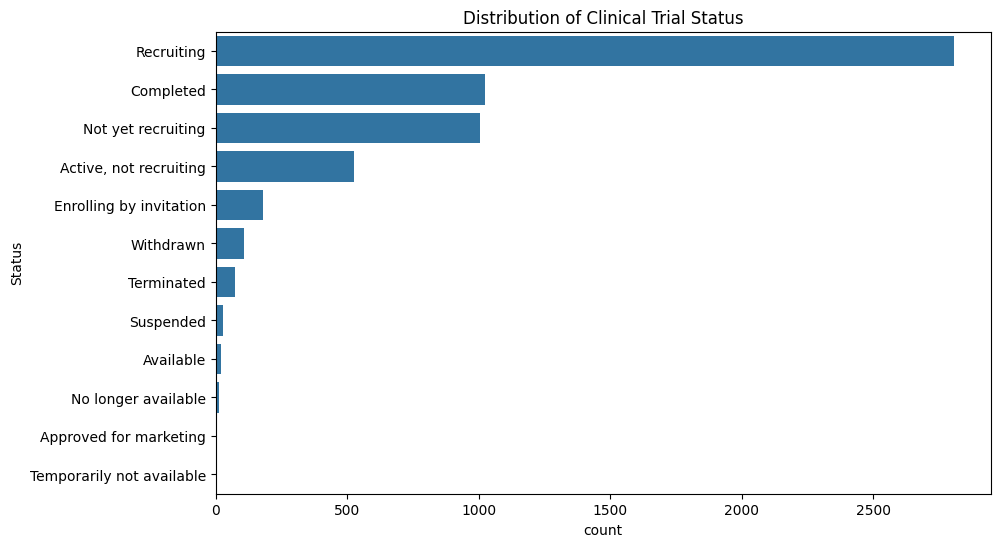

,count
Status,
Recruiting,2805
Completed,1025
Not yet recruiting,1004
"Active, not recruiting",526
Enrolling by invitation,181
Withdrawn,107
Terminated,74
Suspended,27
Available,19


In [14]:
df['Status'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df['Status'], order=df['Status'].value_counts().index)
plt.title("Distribution of Clinical Trial Status")
plt.show()

df['Status'].value_counts()

This chart visualizes the distribution of COVID-19 clinical trials by their current status (e.g., Completed, Recruiting, Terminated), highlighting the overall progress and activity level of pandemic-related research studies.

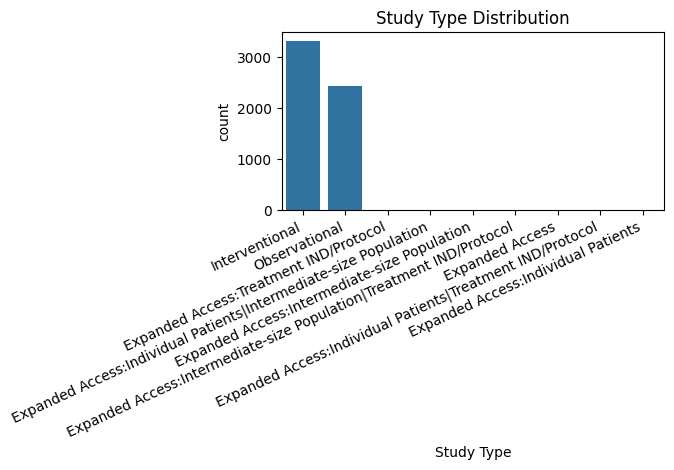

In [15]:
df['Study Type'].value_counts()

sns.countplot(x='Study Type', data=df)
plt.xticks(rotation=25, ha='right')
plt.title("Study Type Distribution")
plt.tight_layout()
plt.show()


In [16]:
df['Study Type'].value_counts()

,count
Study Type,
Interventional,3322
Observational,2427
Expanded Access:Intermediate-size Population,15
Expanded Access:Treatment IND/Protocol,8
Expanded Access:Intermediate-size Population|Treatment IND/Protocol,5
Expanded Access:Individual Patients,3
Expanded Access:Individual Patients|Intermediate-size Population,1
Expanded Access,1
Expanded Access:Individual Patients|Treatment IND/Protocol,1


This chart illustrates the distribution of COVID-19 clinical trials by study type (e.g., Interventional, Observational, Expanded Access), showing the proportion of experimental versus observational research conducted during the pandemic.

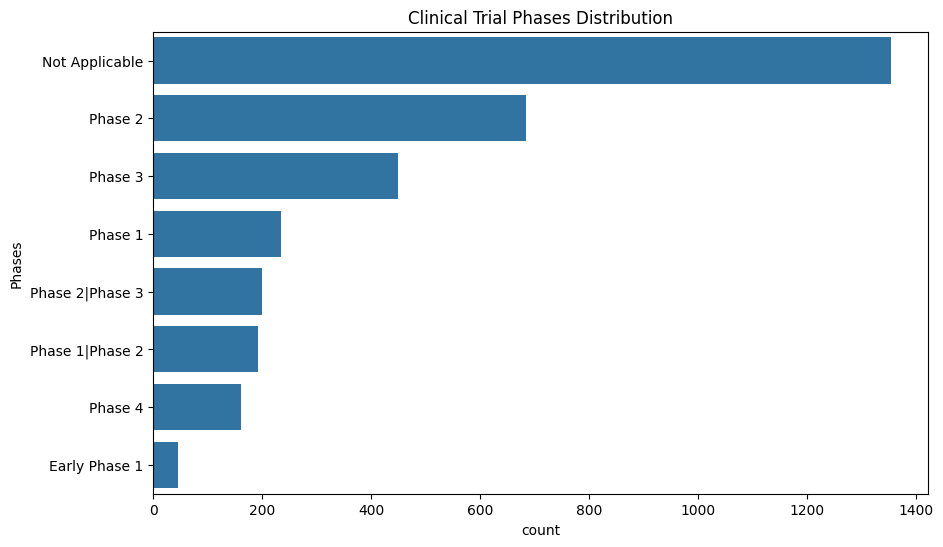

In [ ]:
df['Phases'].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(y=df['Phases'], order=df['Phases'].value_counts().index)
plt.title("Clinical Trial Phases Distribution")
plt.show()


In [ ]:
df['Phases'].value_counts()

,count
Phases,
Not Applicable,1354
Phase 2,685
Phase 3,450
Phase 1,234
Phase 2|Phase 3,200
Phase 1|Phase 2,192
Phase 4,161
Early Phase 1,46


This chart presents the distribution of COVID-19 clinical trials across different phases (e.g., Phase 1, Phase 2, Phase 3, Phase 4), highlighting the stages of drug and vaccine development during the pandemic.

In [ ]:

df['Enrollment'] = pd.to_numeric(df['Enrollment'], errors='coerce')

df['Enrollment'].describe()


,Enrollment
count,5.749000e+03
mean,1.831949e+04
std,4.045437e+05
min,0.000000e+00
25%,6.000000e+01
50%,1.700000e+02
75%,5.600000e+02
max,2.000000e+07


The above output provides a statistical summary of the enrollment variable, including count, mean, standard deviation, minimum, maximum, and quartile values, helping to understand spread of participant sizes across COVID-19 clinical trials.

In [ ]:
df['Sponsor/Collaborators'].value_counts().head(10)


,count
Sponsor/Collaborators,
Assistance Publique - Hôpitaux de Paris,78
Assiut University,57
"University Hospital, Strasbourg, France",40
"University Hospital, Montpellier",34
Hospices Civils de Lyon,31
Cairo University,27
"University Hospital, Toulouse",24
"University Hospital, Lille",23
"Central Hospital, Nancy, France",21


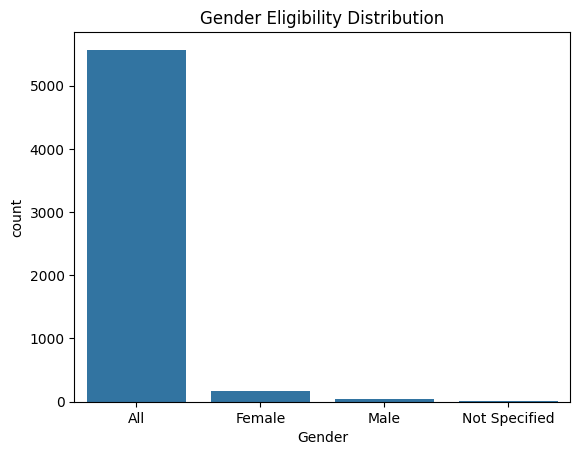

,count
Gender,
All,5567
Female,162
Male,44
Not Specified,10


In [17]:
df['Gender'].value_counts()

sns.countplot(x='Gender', data=df)
plt.title("Gender Eligibility Distribution")
plt.show()

df['Gender'].value_counts()

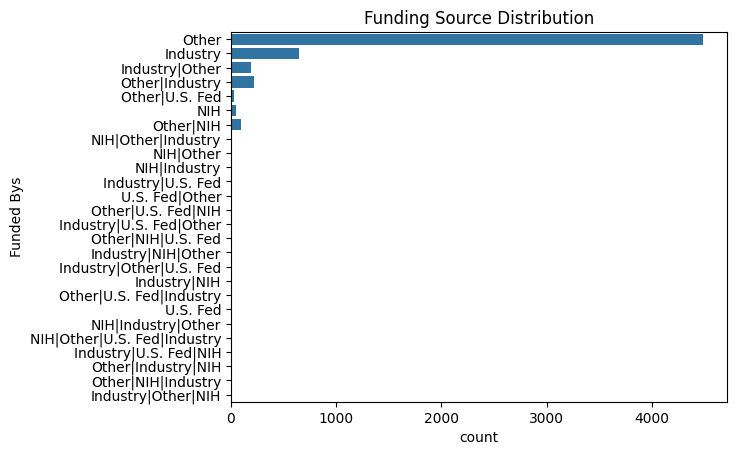

In [ ]:
df['Funded Bys'].value_counts()

sns.countplot(y='Funded Bys', data=df)
plt.title("Funding Source Distribution")
plt.show()


In [ ]:
df['Funded Bys'].value_counts()

,count
Funded Bys,
Other,4488
Industry,651
Other|Industry,216
Industry|Other,190
Other|NIH,97
NIH,51
Other|U.S. Fed,25
U.S. Fed,15
Industry|U.S. Fed,10


This chart presents the distribution of funding sources for COVID-19 clinical trials, highlighting the primary contributors—such as industry, government, or other organizations—supporting pandemic-related research efforts.

In [ ]:
df[df['Outcome Measures'].str.contains('mortality', case=False, na=False)].head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
7,8,NCT04634214,The Severity of COVID 19 in Diabetes and Non-d...,COVID19,Not yet recruiting,No Results Available,Covid19|Type2 Diabetes,NaN,Severity of COVID 19 among people with and wit...,India Diabetes Research Foundation & Dr. A. Ra...,...,IDRFARH015,"November 16, 2020","February 16, 2021","May 16, 2021","November 18, 2020",NaN,"November 18, 2020","Orthomed Hospital, Chennai, Tamil Nadu, India|...",NaN,https://ClinicalTrials.gov/show/NCT04634214
9,10,NCT04384588,COVID19-Convalescent Plasma for Treating Patie...,FALP-COVID,Recruiting,No Results Available,COVID-19 Infection|Cancer Patients|General Pop...,Biological: Convalescent Plasma from COVID-19 ...,in-hospital mortality secondary to COVID-19 am...,Fundacion Arturo Lopez Perez|Confederación de ...,...,FALP 001-2020,"April 7, 2020","April 6, 2021","April 6, 2021","May 12, 2020",NaN,"May 12, 2020","Fundacion Arturo Lopez Perez, Providencia, San...",NaN,https://ClinicalTrials.gov/show/NCT04384588
10,11,NCT04355897,CoVID-19 Plasma in Treatment of COVID-19 Patients,NaN,Recruiting,No Results Available,COVID 19,Biological: Convalescent COVID 19 Plasma,Reduce mortality|Reduce requirement for mechan...,The Christ Hospital,...,20-23,"April 28, 2020",July 2020,August 2020,"April 21, 2020",NaN,"May 20, 2020","The Christ Hospital, Cincinnati, Ohio, United ...",NaN,https://ClinicalTrials.gov/show/NCT04355897
21,22,NCT04473170,Study Evaluating the Safety and Efficacy of Au...,SENTAD-COVID,Completed,No Results Available,Coronavirus Disease 2019 (COVID-19),Biological: Autologous Non-Hematopoietic Perip...,Adverse reactions incidence.|Rate of mortality...,Abu Dhabi Stem Cells Center,...,CT.001.1.0.SENTAD-COVID,"April 4, 2020","May 20, 2020","July 14, 2020","July 16, 2020",NaN,"July 16, 2020","Abu Dhabi Stem Cells Center, Abu Dhabi, United...",NaN,https://ClinicalTrials.gov/show/NCT04473170
26,27,NCT04427345,Predictive Factors COVID-19 Patients,MI-COVID,Recruiting,No Results Available,covid19,Other: Predictive factors for clinical respons...,Identify risk factors for intra-hospital morta...,University of Milano Bicocca,...,MI-COVID,"April 30, 2020","April 30, 2021","April 30, 2021","June 11, 2020",NaN,"November 9, 2020","ASST Monza-Ospedale San Gerardo, Monza, Italy",NaN,https://ClinicalTrials.gov/show/NCT04427345


This analysis filters outcome measures containing the term “mortality” to identify trials specifically evaluating death-related endpoints, highlighting the focus on survival outcomes in COVID-19 clinical research.

#Key Insights

The majority of studies are Interventional, indicating active treatment-based research dominates the dataset.

• Most trials fall under Phase 2 and Phase 3, suggesting strong focus on treatment efficacy and safety validation.

• A significant portion of studies are marked as Completed, while a smaller percentage remain ongoing or terminated.

• Enrollment distribution is highly right-skewed, with most studies having small to moderate participant counts and a few large-scale studies influencing the overall range.

• Studies including All genders represent the largest category.

• Study initiation trends increased after recent years, indicating growth in clinical research activity.

• Trial durations vary significantly, with later-phase studies generally lasting longer

#Conclusion

This project analyzed clinical trial data to understand study types, phases, enrollment patterns, and research trends. The analysis showed that interventional studies and Phase 2–3 trials dominate the dataset, with varying enrollment sizes and study durations reflecting differences in research design. Overall, the project demonstrates how proper data cleaning and exploratory analysis can convert raw healthcare data into meaningful insights that support better understanding of clinical research activity.